In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
import cv2 as cv

# Introduction

In this notebook I will use Yolo V5 to do object detection on the images of the dataset. This will likely be different to the average notebook as I will be cloning the github of YoloV5 to use it and therefore working with the filesystem of Kaggle.

I hope this serves as an introduction on how to use this powerful tool for image segmentation that is YoloV5

# Look at Some Images

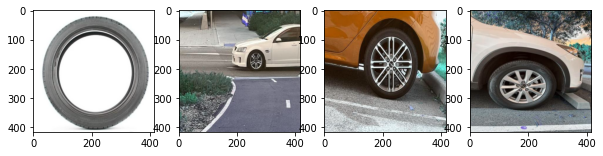

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("../input/sptire/train/images/14_19_l_jpg.rf.8323d9f848377e32ca451017a3a80731.jpg")
ax[0].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0719_JPEG.rf.05f197445c4a42854e0b1f308fb4e636.jpg")
ax[1].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0680_JPEG.rf.560c49e01182db8356989ddc604557fb.jpg")
ax[2].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0701_JPEG.rf.d5ae66ab383142ef5d59b0454a19fdce.jpg")
ax[3].imshow(image)
fig.show()

# Download YoloV5

In [2]:
# Download YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 15814 (delta 10), reused 26 (delta 10), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 25.80 MiB/s, done.
Resolving deltas: 100% (10822/10822), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.9/605.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
/content
Setup complete. Using torch 2.0.1+cu118 (CPU)


# New YAML file

Create new Yaml file to fit the file system.

In [ ]:
# Create .yaml file
import yaml

data_yaml = dict(
    train = '../../input/sptire/train',
    val = '../../input/sptire/valid',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [ ]:
%cd yolov5

/kaggle/tmp/yolov5


# Train the Yolov5 Model

In [ ]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml --weights yolov5n.pt

W&B disabled.
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5n.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, 

# Model Validation Output

Let's look at how the model performed on a validation batch

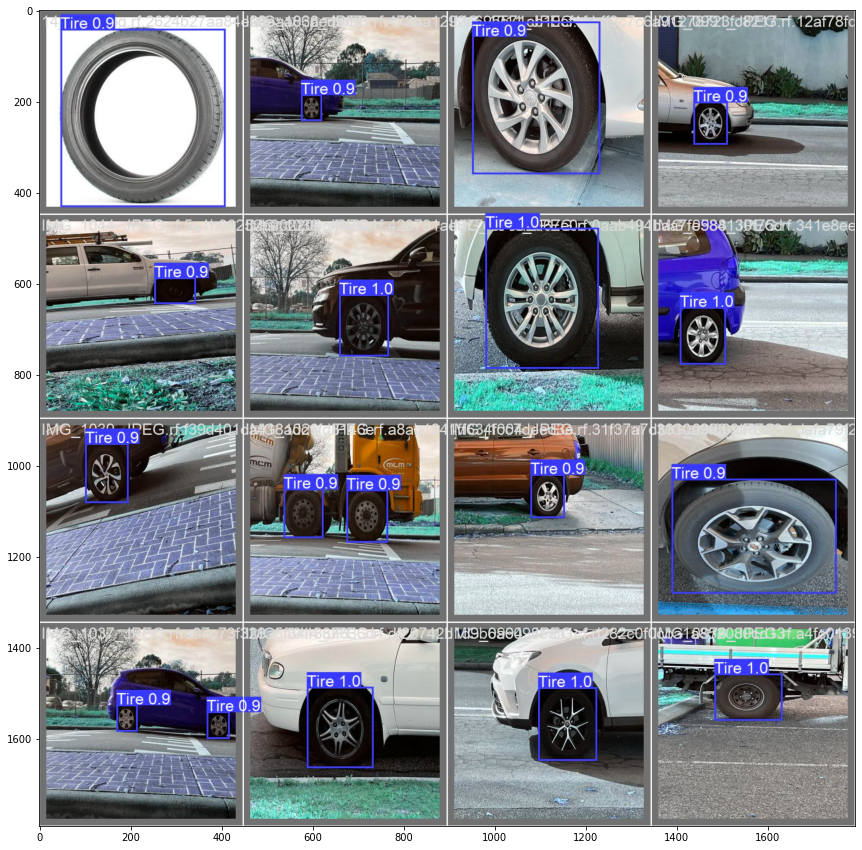

In [ ]:
img = cv.imread("runs/train/exp/val_batch0_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [3]:
!python /content/yolov5/detect.py --source /content/car1.jpg --weights /content/best.pt

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['/content/best.pt'], source=/content/car1.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=

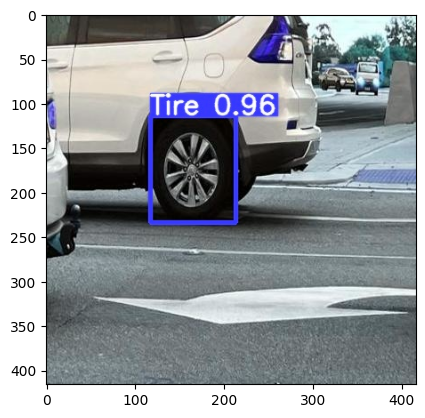

In [5]:
img = cv.imread("/content/yolov5/runs/detect/exp/car1.jpg")
plt.imshow(img)